In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
df = pd.read_excel('/content/Airbnb_Dataset.xlsx')

In [22]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [24]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [25]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [26]:
df.drop_duplicates(inplace=True)

df.drop(['house_rules', 'license'], axis=1, inplace=True)

df.rename(columns={
    'price': 'price_$', 'service fee': 'service_fee_$'
}, inplace=True)

df.dropna(inplace=True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'brooklyn'

df = df.drop(df[df['availability 365'] > 365].index)

In [27]:
df.duplicated().value_counts()

,count
False,81242


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 81242 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81242 non-null  object        
 1   NAME                            81242 non-null  object        
 2   host id                         81242 non-null  object        
 3   host_identity_verified          81242 non-null  object        
 4   host name                       81242 non-null  object        
 5   neighbourhood group             81242 non-null  object        
 6   neighbourhood                   81242 non-null  object        
 7   lat                             81242 non-null  float64       
 8   long                            81242 non-null  float64       
 9   country                         81242 non-null  object        
 10  country code                    81242 non-null  object        
 11  instan

In [29]:
df.describe()


,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81242.000000,81242.000000,81242.000000,81242.00000,81242.000000,81242.000000,81242.000000,81242.000000,81242,81242.000000,81242.000000,81242.000000,81242.000000
mean,40.727256,-73.948263,0.497464,2012.48987,626.625760,125.326211,7.418047,32.010303,2019-06-21 03:51:10.027817984,1.390924,3.286305,7.106792,135.037148
min,40.504560,-74.249840,0.000000,2003.00000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982070,0.000000,2007.00000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721250,-73.953590,0.000000,2012.00000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930480,1.000000,2017.00000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.00000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056391,0.050625,0.499997,5.76077,331.762832,66.355878,28.366255,51.665773,NaN,1.761280,1.278717,29.854202,128.464648


In [30]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,42930
Private room,36590
Shared room,1614
Hotel room,108


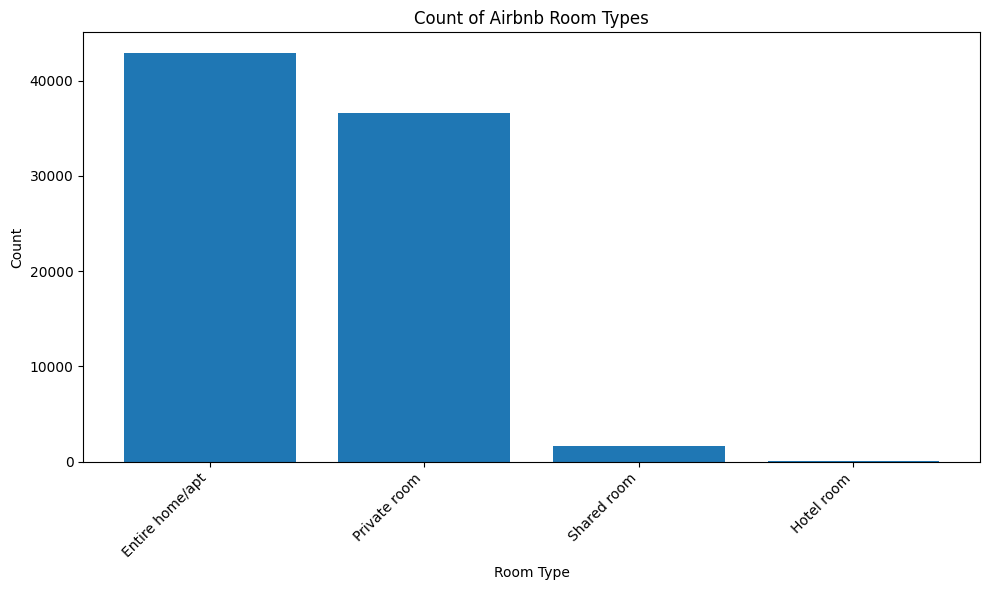

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(property_types.index, property_types['count'])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Airbnb Room Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph shows the total number of listings for each type of room available (Entire home/apt, Private room, Shared room, and Hotel room). It provides a clear picture of the distribution of listing types in the dataset, indicating which types are most prevalent.

In [32]:
head_group = df['neighbourhood group'].value_counts().to_frame()
head_group

,count
neighbourhood group,
Brooklyn,33708
Manhattan,33541
Queens,10946
Bronx,2241
Staten Island,805
brooklyn,1


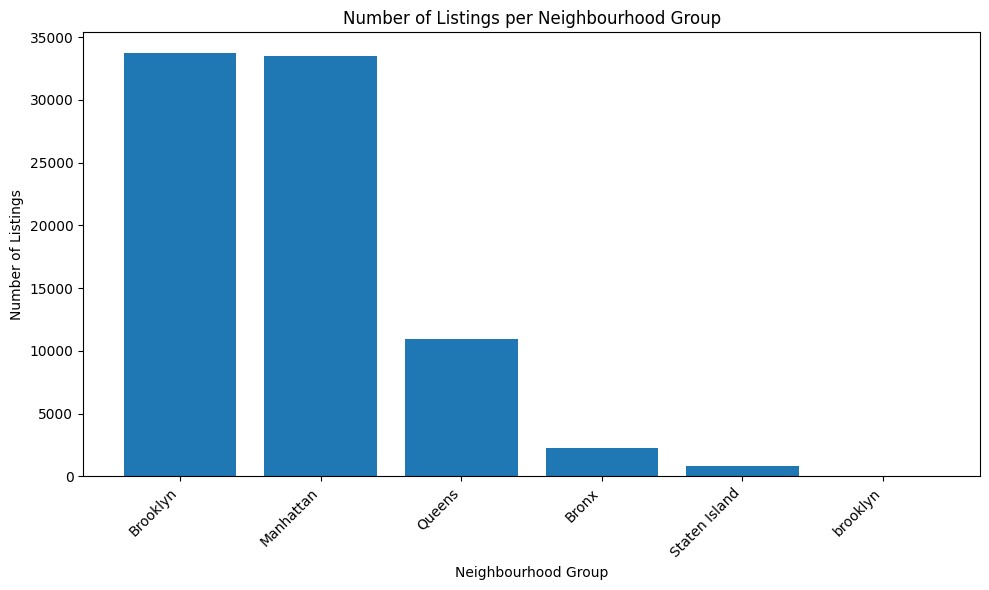

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(head_group.index, head_group['count'])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Neighbourhood Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This plot illustrates how the number of Airbnb listings is distributed across different neighbourhood groups in the dataset. It helps identify which neighbourhood groups have the highest and lowest number of listings.

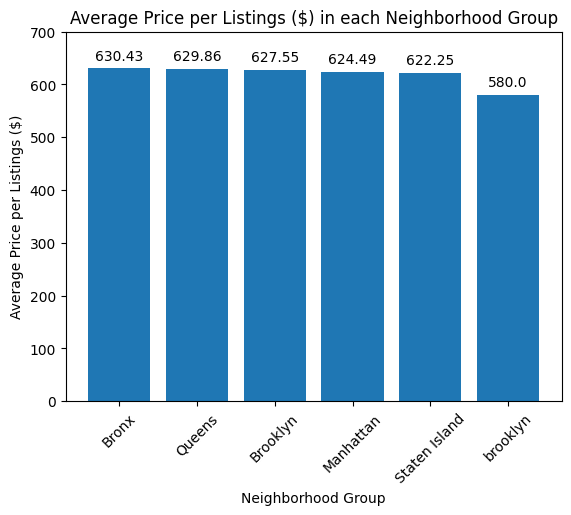

In [34]:
avg_price = df.groupby('neighbourhood group') ['price_$'].mean().sort_values(ascending = False).to_frame ()

avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);

plt.bar_label (avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);

plt.ylim([0,700]);

plt.xlabel('Neighborhood Group');

plt.ylabel('Average Price per Listings ($)');

plt.xticks (rotation = 45);

plt.title('Average Price per Listings ($) in each Neighborhood Group');

This bar graph displays the average listing price for each neighbourhood group. It allows for a comparison of how prices vary across different areas, highlighting which neighbourhood groups tend to have higher or lower average prices.

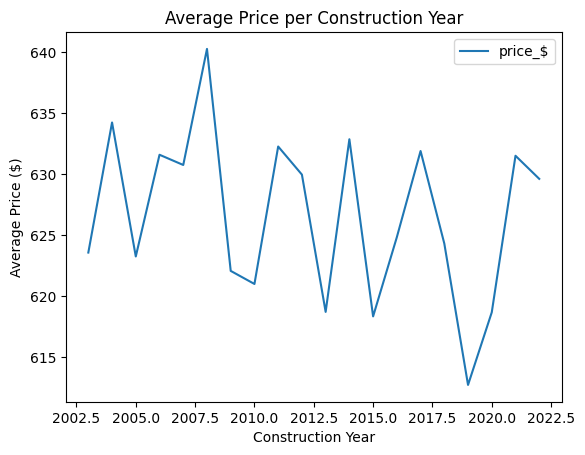

In [35]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price per Construction Year');

This line plot shows the trend of average listing price over the construction years of the properties. It can help identify if there is a general relationship between the age of a building and its average price.

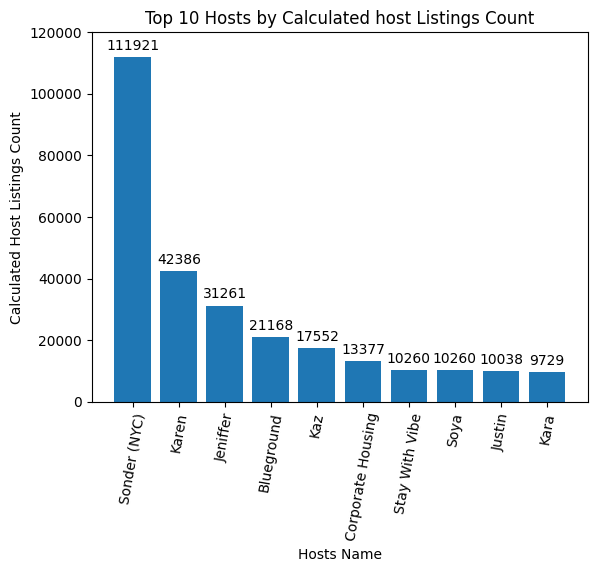

In [36]:
hosts = df.groupby('host name') ['calculated host listings count'].sum().sort_values (ascending = False).nlargest (10).to_frame()

hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);

plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);

plt.xlabel('Hosts Name');

plt.ylabel('Calculated Host Listings Count');

plt.xticks (rotation = 80);

plt.ylim([0, 120000]);

plt.title('Top 10 Hosts by Calculated host Listings Count');

This bar graph highlights the top 10 hosts based on the total number of listings they have. It shows who the largest hosts are in terms of inventory size.

<Figure size 800x500 with 0 Axes>

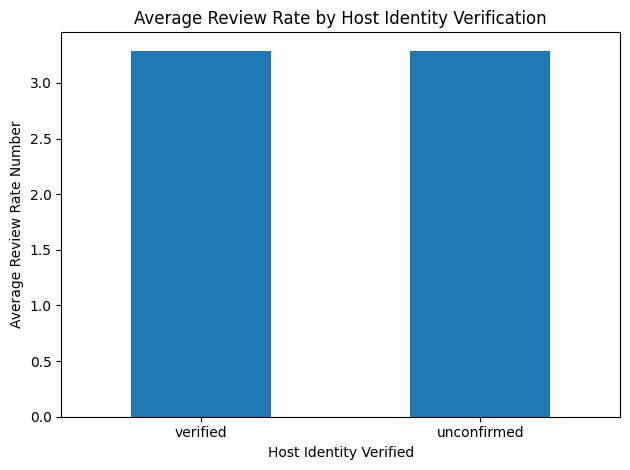

In [37]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review
plt.figure(figsize=(8, 5))
review.plot(kind='bar', legend=False)
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate by Host Identity Verification')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This bar graph compares the average review rate for hosts whose identities are verified versus those who are unconfirmed. It provides insight into whether identity verification has an impact on the average review score received by hosts.

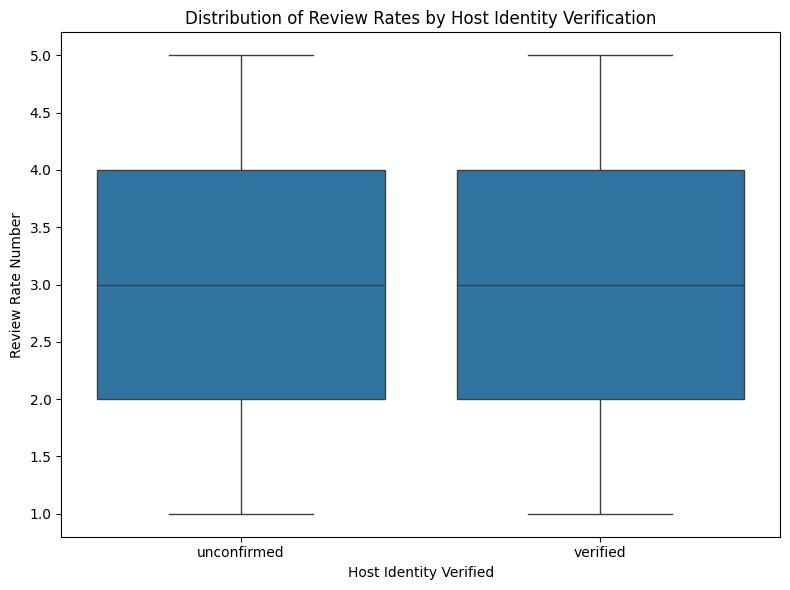

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='host_identity_verified', y='review rate number', data=df)
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.title('Distribution of Review Rates by Host Identity Verification')
plt.tight_layout()
plt.show()

This box plot visualizes the distribution of review rate numbers for both verified and unconfirmed hosts. It shows the median, quartiles, and potential outliers for each group, offering a more detailed view of the review rate spread compared to the simple average shown in the bar graph.

In [39]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909005366615)

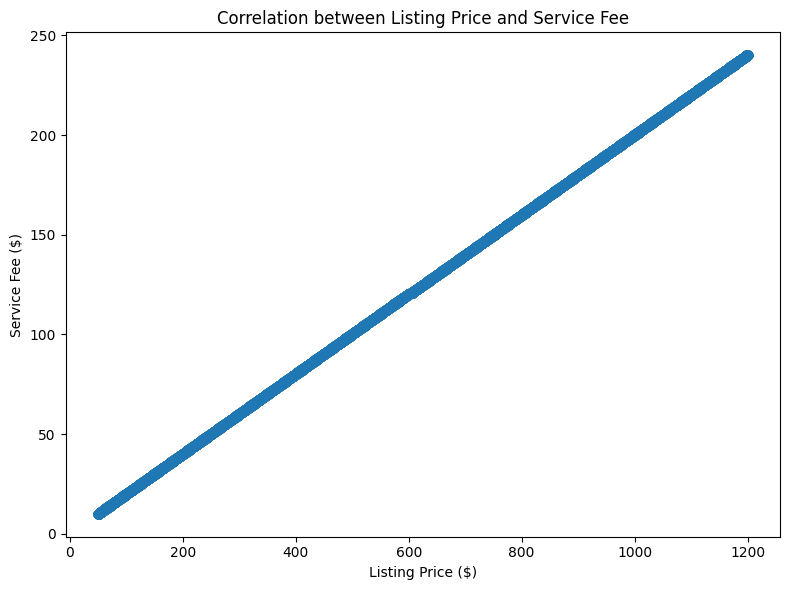

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x='price_$', y='service_fee_$', data=df)
plt.xlabel('Listing Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Correlation between Listing Price and Service Fee')
plt.tight_layout()
plt.show()

This scatter plot with a regression line shows the relationship between the listing price and the service fee. The regression line helps to visualize the trend, and the scatter of points shows the individual data points. The correlation coefficient calculated separately provides a numerical measure of the strength and direction of this linear relationship.

In [41]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.378190
                    Private room               3.315789
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.251608
                    Hotel room                 3.833333
                    Private room               3.283334
                    Shared room                3.327759
Manhattan           Entire home/apt            3.274865
                    Hotel room                 3.500000
                    Private room               3.293353
                    Shared room                3.269350
Queens              Entire home/apt            3.358124
                    Hotel room                 3.750000
                    Private room               3.317546
                    Shared room                3.326087
Staten Island       Entire home/apt            3.326877
                    Private room               3.490909
                    Shared room                3.714286
brooklyn            Private room               4.000000

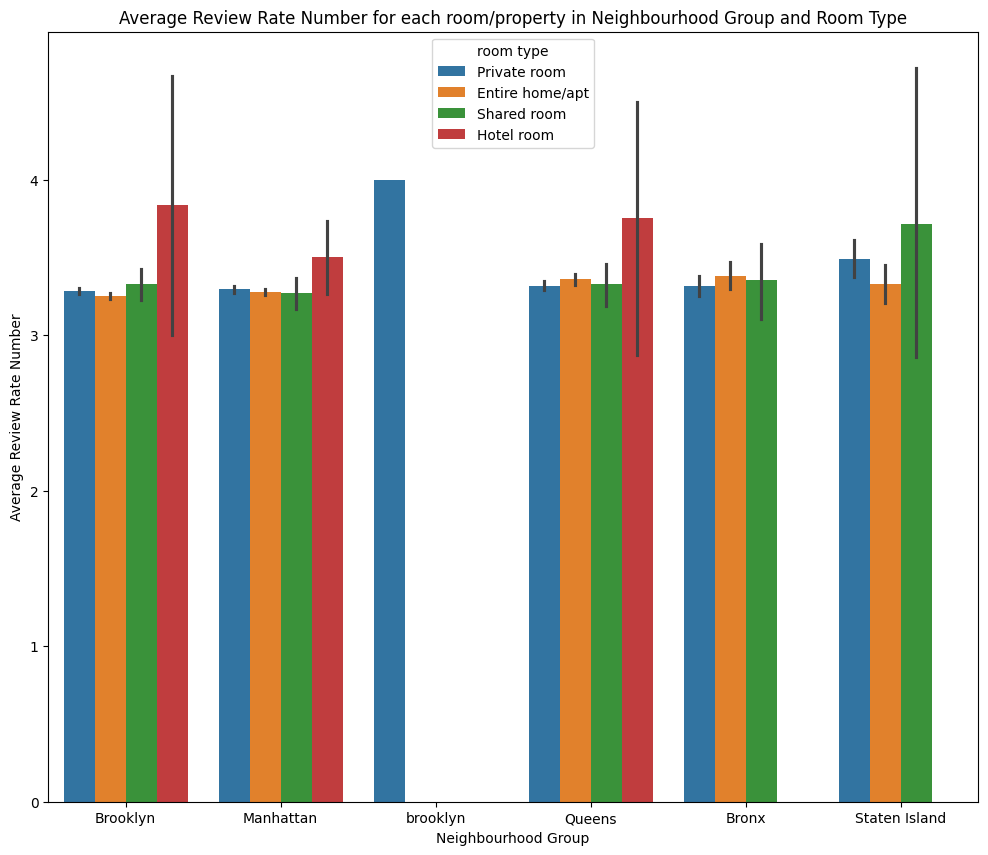

In [42]:
plt.figure(figsize=(12, 10));
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each room/property in Neighbourhood Group and Room Type');

This bar plot visualizes how the average review rate number varies across different combinations of neighbourhood groups and room types. It allows you to see which neighbourhood groups and room types tend to have higher or lower average review scores.

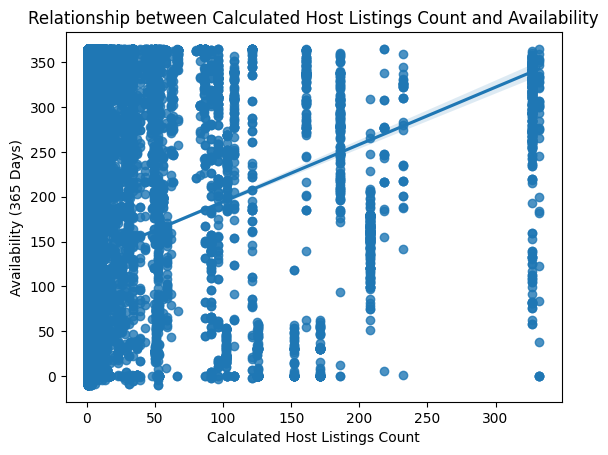

In [43]:
sns.regplot(data=df, x='calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability (365 Days)');
plt.title('Relationship between Calculated Host Listings Count and Availability');

This scatter plot with a regression line shows the relationship between the listing price and the service fee. The regression line helps to visualize the trend, and the scatter of points shows the individual data points. The correlation coefficient calculated separately provides a numerical measure of the strength and direction of this linear relationship.